In [1]:
import pandas as pd

data1 = {"col1":[1,2,3,4,5,6],"col2":[1,4,2,8,16,32]}
data2 = {"col1":[6,5,4,3,2,1],"col2":[3,6,1,2,5,9]}
df1 = pd.DataFrame(data1) # 데이터프레임1
df2 = pd.DataFrame(data2) # 데이터프레임2
print(df1)
print()
print(df2)

   col1  col2
0     1     1
1     2     4
2     3     2
3     4     8
4     5    16
5     6    32

   col1  col2
0     6     3
1     5     6
2     4     1
3     3     2
4     2     5
5     1     9


---

- corr메서드는 각 열 간의 상관 계수를 반환하는 메서드입니다.
- corrwith메서드는 두 DataFrame객체의 동일한 행/열 간의 상관 계수를 반환하는 메서드입니다.

- DataFrame.corr(method='pearson or kendall or spearman', min_periods=1)
- DataFrame.corrwith(other, axis=0, drop=False, method='pearson or kendall or spearman')

### [피어슨 상관계수]

- 피어슨 상관계수는 두 변수 간의 선형 상관관계를 계량화 한 수치입니다. 코시-슈바르츠 부등식에 의해 +1과 -1사이의 값을 가집니다.

- +1의 경우 완벽한 양의 선형 상관 관계, -1의 경우 완벽한 음의 상관관계, 0의 경우 선형 상관관계를 갖지 않습니다.


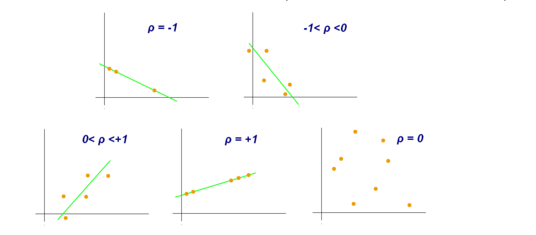


### [켄달-타우상관계수]

- 켄달-타우 상관계수는 두 변수들간의 순위를 비교해서 연관성을 계산하는 방식입니다.

- 예를들어 어린이의 나이와 키에 대한 아래와 같은 순위 데이터를 보면, 나이순위에 따라 키의 순위가 동일한 것을 알 수 있습니다.


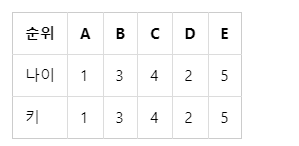

-> 이런 경우 켄달-타우 상관계수의 경우 완벽한 양의 상관 계수인 +1이 됩니다.

### [스피어먼 상관계수]

- 스피어먼 상관계수는 두 변수의 순위 값 사이의 피어슨 상관 계수와 같습니다.

- 즉, 순서척도가 적용되는 경우에는 스피어먼 상관계수가, 간격척도가 적용되는 경우에는 피어슨 상관계수가 적용됩니다.

---

In [3]:
print(df1.corrwith(other = df2, method = 'pearson')) # 피어슨 상관계수 적용


col1   -1.000000
col2    0.801835
dtype: float64


---

In [4]:
data3 = {"col1":[1,2,3,4,5,6],"col2":[1,4,2,8,16,32]}
data4 = {"col1":[6,5,4,3,2,1],"col3":[3,6,1,2,5,9]}
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

In [5]:
print(df3.corrwith(other = df4, method = 'pearson')) 
# 피어슨 상관계수 적용
# corrwith를 사용하면 두 데이터가 공통으로 갖는 열에 대해서만 상관관계 계산이 진행된다.

col1   -1.0
col2    NaN
col3    NaN
dtype: float64


In [6]:
print(df3.corrwith(other = df4, method = 'pearson', drop = True)) # drop=True를 설정하면 NaN 열을 제외하고 출력한다.

col1   -1.0
dtype: float64


---

In [7]:
# 이번에는 corr() 메서드를 써보자

col4 = [1,2,3,4,5,6]
col5 = [1,4,2,8,16,32]
col6 = [6,5,4,3,2,1]
data = {"col4":col4,"col5":col5,"col6":col6}
df = pd.DataFrame(data)
print(df)

   col4  col5  col6
0     1     1     6
1     2     4     5
2     3     2     4
3     4     8     3
4     5    16     2
5     6    32     1


In [8]:
print(df.corr(method='pearson')) # 피어슨 상관계수 적용

          col4      col5      col6
col4  1.000000  0.887739 -1.000000
col5  0.887739  1.000000 -0.887739
col6 -1.000000 -0.887739  1.000000


- col4이 증가할 경우 col5는 대체로 증가하는 경향을 가지기에 0<p<1의 값을 가지며,
- col4이 증가할 경우 col6은 완벽히 감소하기 때문에 p=-1의 값을 가집니다

In [9]:
print(df.corr(method='kendall')) # 켄달-타우 상관계수 적용

          col4      col5      col6
col4  1.000000  0.866667 -1.000000
col5  0.866667  1.000000 -0.866667
col6 -1.000000 -0.866667  1.000000


- col4의 순위는 col5의 순위와 대체로 일치 하기에 0<p<1의 값을 가지며,
- col4의 순위는 col6의 순위와 완벽히 반대이기 때문에 p=-1의 값을 가집니다

In [10]:
print(df.corr(method='spearman')) # 스피어먼 상관계수 적용

          col4      col5      col6
col4  1.000000  0.942857 -1.000000
col5  0.942857  1.000000 -0.942857
col6 -1.000000 -0.942857  1.000000


- col4의 변수들의 순위는 col5의 변수들의 순위와 대체로 일치 하기에 두 변수의 순위의 피어슨 상관계수는 0<p<1의 값을 가지며,
- col4의 변수들의 순위는 col6의 변수들의 순위와 완벽히 반대이기 때문에 두 변수의 순위의 피어슨 상관계수는p=-1의 값을 가집니다

# 위 방식들을 활용하여, 아이템 기반 협업 필터링을 진행해봐도 좋을 듯 하다

---

### 그렇다면 무엇을 기준으로 어떤 상관계수를 적용할 것인가?

### => 평점 (단 카.공과 관련된 평점이 아니다보니 카공의 방향성에 안 어울릴 수 있다...
### => 그럼 어떤 기준??

참고
https://www.kaggle.com/code/kanncaa1/recommendation-systems-tutorial